### Financial Engineering 
# Module Assignment - Part 2

<hr>

## Table of Contents
1. [Question 1](#q1)
2. [Question 2](#q2)
3. [Question 3](#q3)
4. [Question 4](#q4)
5. [Question 5](#q5)

In [1]:
# importing dependencies 
import warnings
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.dates import YearLocator
from matplotlib.dates import MonthLocator
import fintech.prices as pr # for prices
import fintech.dataio as dtio # for data input & output 
import fintech.finmodels as fmd # for financial models 
import fintech.constants as const # for constant values 
from IPython.display import display
from hmmlearn.hmm import GaussianHMM


warnings.filterwarnings("ignore")

<a id="q1"></a>
## Question #1

Consider an investment portfolio consisting of \\$100K in Aluminium and \\$400K in Zinc. The daily
volatility of Aluminium is 0.70% and for Zinc is 0.20%. The correlation coefficient between them is
0.70.

<b>(i)</b> Calculate the 15-day, 99% Value at Risk (VaR) of the portfolio. 

In [2]:
# correlation coefficient 
aluminium_zinc_corr = 0.70

# volatility for the assets
vol_aluminium = 0.70 / 100
vol_zinc = 0.20 / 100

# get the volataility for the next 15 days
vol_aluminium = vol_aluminium * np.sqrt(15)
vol_zinc = vol_zinc * np.sqrt(15)

# value for each asset
value_aluminium = 100000
value_zinc = 400000

# create variance-cov matrix 
var_aluminium = vol_aluminium ** 2
var_zinc = vol_zinc ** 2
var_cov = np.array([[var_aluminium, aluminium_zinc_corr * vol_aluminium * vol_zinc] 
                    ,[aluminium_zinc_corr * vol_zinc * vol_aluminium, var_zinc]])

# calculate variance in dollar 
value_port = np.array([[value_aluminium], [value_zinc]])
variance_port = np.matmul(var_cov, value_port)

# calculate portfolio VaR
vol_port = round(np.sqrt(np.matmul(value_port.T, variance_port)[0][0]), 2)
var_port_99 = round(vol_port * 2.33, 2) # 99% confidence 

# print result 
print("15-day VaR(99%) is: ${0} with a portfolio volatility of: ${1}".format(var_port_99, vol_port))

15-day VaR(99%) is: $12484.54 with a portfolio volatility of: $5358.17


<b>(ii)</b> Comment on the impact of diversification on the portfolio VaR (what would be the VaR if the total $500K is invested in only Aluminium and Zinc?).

In [3]:
# VaR (99%) if all value was invested in aluminium 
value_sum = np.sum(value_port)
var_aluminium_99 = round((vol_aluminium * value_sum) * 2.33, 2)
print("15-day VaR(99%): ${0} if ${1} was invested only in Aluminium".format(var_aluminium_99, value_sum))

# VaR (99%) if all value was invested in zinc 
var_aluminium_99 = round((vol_zinc * value_sum) * 2.33, 2)
print("15-day VaR(99%): ${0} if ${1} was invested only in Zinc".format(var_aluminium_99, value_sum))

15-day VaR(99%): $31584.18 if $500000 was invested only in Aluminium
15-day VaR(99%): $9024.05 if $500000 was invested only in Zinc


<a id="q2"></a>
## Question #2

<b>(i)</b> Download closing prices for Apple for the period 01/01/2013 and 30/11/2017. Apply daily log returns and measure the average daily return.

In [4]:
# downloading closing prices for apple 
data_path = "data/part_2/"
aapl_ticker = "AAPL"

# date format '%Y-%m-%d' from 01/01/2013 to 30/11/2017
start_date = "2013-01-01"
end_date = "2017-11-30"

# download prices for AAPL if they are not found in data path 
dtio.df2csv(data_path, aapl_ticker, pr.download_prices, aapl_ticker, start_date, end_date)

# importing AAPL prices from csv to pandas dataframe 
aapl_prices = dtio.csv2df(data_path, aapl_ticker)

# calculate daily log returns for aapl
aapl_prices[const.COL_LOG_RETURN] = pr.log_diff(dataframe=aapl_prices, 
                                         column=const.COL_ADJ_CLOSE, 
                                         shift=1)

# display daily log returns for AAPL (head and tail rows)
display(aapl_prices.head())
display(aapl_prices.tail())

# print rows count before dropping NaN 
print("Rows before dropping NaN: {0}".format(aapl_prices.shape[0]))

# drop NaN daily log returns 
aapl_prices = aapl_prices.dropna()

# print rows count after dropping NaN 
print("Rows after dropping NaN: {0}".format(aapl_prices.shape[0]))

# calculating the avg daily return 
avg_logret = round(np.mean(aapl_prices[const.COL_LOG_RETURN]) * 100 , 3)
print("\nAvg daily log return for {0}: {1}%".format(aapl_ticker, avg_logret))

File already found in path specified: data/part_2/AAPL.csv.


,Date,Open,High,Low,Close,Adj Close,Volume,Log Returns
0,2012-12-31,72.932854,76.485718,72.714287,76.024284,54.206390,164873100,NaN
1,2013-01-02,79.117142,79.285713,77.375717,78.432854,55.923737,140129500,0.031190
2,2013-01-03,78.268570,78.524284,77.285713,77.442856,55.217865,88241300,-0.012702
3,2013-01-04,76.709999,76.947144,75.118568,75.285713,53.679771,148583400,-0.028250
4,2013-01-07,74.571426,75.614288,73.599998,74.842857,53.364014,121039100,-0.005900


,Date,Open,High,Low,Close,Adj Close,Volume,Log Returns
1234,2017-11-22,173.360001,175.000000,173.050003,174.960007,172.372147,25588900,0.010457
1235,2017-11-24,175.100006,175.500000,174.649994,174.970001,172.382004,14026700,0.000057
1236,2017-11-27,175.050003,175.080002,173.339996,174.089996,171.514999,20716800,-0.005042
1237,2017-11-28,174.300003,174.869995,171.860001,173.070007,170.510101,26428800,-0.005876
1238,2017-11-29,172.630005,172.919998,167.160004,169.479996,166.973206,41666400,-0.020961


Rows before dropping NaN: 1239
Rows after dropping NaN: 1238

Avg daily log return for AAPL: 0.091%


<b>(ii)</b> We wish to measure volatility. Compare and discuss pros and cons of utilising the Historical method, Exponentially Moving Average method or Garch.

<b>(iii)</b> Use Garch(1,1) to measure volatility based on the data from (i). 

In [5]:
# compute volatility based on Garch(1,1)
aapl_anualized_vol = fmd.arch_vol(returns=aapl_prices[const.COL_LOG_RETURN],
                                  year_days=const.YEAR_250,
                                  update_freq=5,
                                  verbose=False,
                                  kwargs = {"vol":"Garch", 
                                            "p":1, 
                                            "o":0, 
                                            "q":1,
                                            "dist":"Normal"})

# print results
aapl_anualized_vol = round(aapl_anualized_vol, 2)
print("Annualized Volatility for AAPL based of Garch(1,1): {0}%".format(aapl_anualized_vol))

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: -3448.714350636422
            Iterations: 6
            Function evaluations: 19
            Gradient evaluations: 2
Annualized Volatility for AAPL based of Garch(1,1): 22.46%


/home/delinvas/anaconda3/envs/ari51220/lib/python3.7/site-packages/arch/univariate/base.py:571: ConvergenceWarning: 
The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


<b>(iv)</b> Assume that Apple stock prices follow a Geometric Brownian stochastic process. Utilising the average return and volatility statistics identified in part <b>(i)</b> and <b>(iii)</b>, simulate, on a day by day basis, the movement of Apple stock for the next 20 days (i.e. starting from 1st December, as per date range in part <b>(i)</b>). Repeat this process for 100 times, hence creating 100 possible price realisations over the next 20 days. Describe the steps/approach used and present a plot showing the projected 100 realisations.

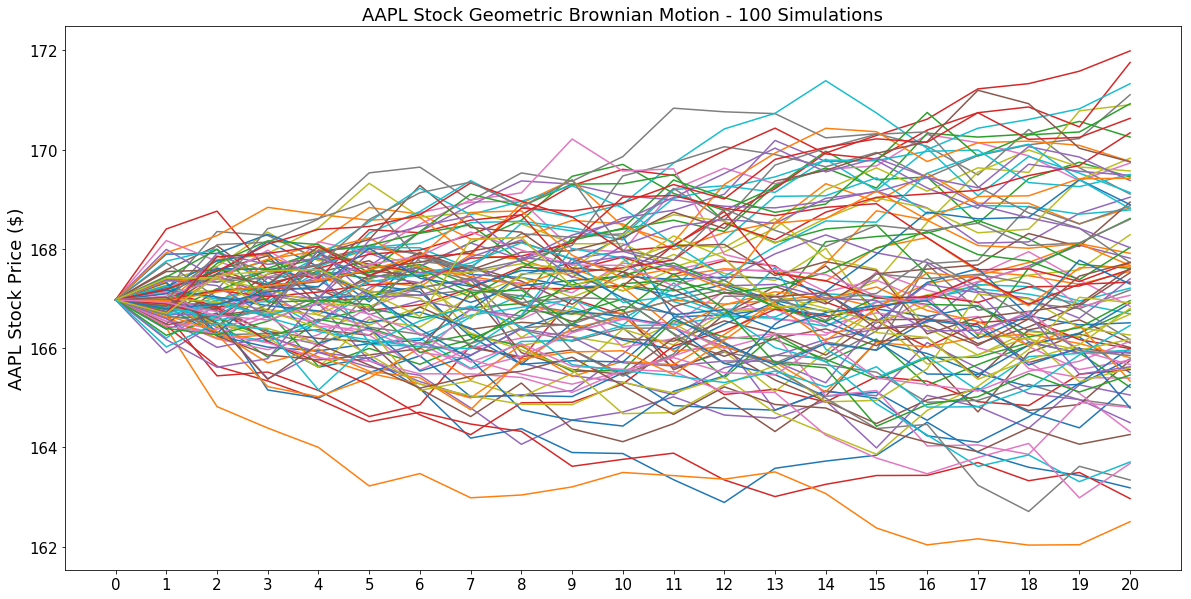

In [6]:
# parameters for geometric brownian motion
n_increments = 20
n_simulations = 100
current_price = aapl_prices.tail(1)[const.COL_ADJ_CLOSE].values[0]
expected_return = avg_logret / 100
expected_volatility = (aapl_anualized_vol * np.sqrt(1/const.YEAR_250)) / 100

# reference to hold prices at t+20 for Q2.(v) 
prices_t_20 = []

# start simulation
plt.figure(figsize=(20,10))
for i in range(n_simulations):
    brownian_path = fmd.brownian_motion(n_increments=n_increments)[0]
    stock_prices, time_periods = fmd.geo_brownian_motion(current_price=current_price, 
                                                         expected_return=expected_return, 
                                                         expected_volatility=expected_volatility, 
                                                         brownian_path=brownian_path, 
                                                         n_increments=n_increments)
    
    # append last price to list 
    prices_t_20.append(stock_prices[n_increments])
    
    # plot each path
    plt.plot(time_periods, stock_prices)

# show plot with results
plt.ylabel("AAPL Stock Price ($)", fontsize=18)
plt.title("AAPL Stock Geometric Brownian Motion - {0} Simulations".format(n_simulations), fontsize=18)
plt.tick_params(labelsize=15)
plt.xticks(np.arange(0, 1 + 1/n_increments, 1/n_increments), labels=np.arange(0, n_increments + 1, 1))
plt.show()

<b>(v)</b> Using the prices obtained at the end of each simulated realisation, i.e. simulated prices at t+20 days, calculate the 20 day Value at Risk (VaR) at 95% confidence level. Hint: You can use the percentile approach on the 20 day returns. 

In [7]:
# sort the prices at t+20
aapl_var_95 = round(np.percentile(prices_t_20, 95) - current_price, 2)
print("VaR(95%) for AAPL stock for {0} day VaR based on the simulation is: ${1}".format(n_increments, aapl_var_95))

VaR(95%) for AAPL stock for 20 day VaR based on the simulation is: $3.93


<a id="q3"></a>
## Question #3

Hidden Markov Models (HMM) are an important unsupervised learning method used to analyse sequence data and identifying underlying regimes that govern the data.

This question relates to detecting regime changes in volatility (risk).

<b>(i)</b> Download and calculate the last 10 year daily returns of the S&P 500 index (till 31/12/2017).

In [8]:
# downloading closing prices for S&P500
sp_ticker = "^GSPC"

# date format '%Y-%m-%d' from 01/01/2008 to 31/12/2017 (10 Years)
start_date = "2008-01-01"
end_date = "2017-12-31"

# download prices for S&P500 if they are not found in data path 
dtio.df2csv(data_path, sp_ticker, pr.download_prices, sp_ticker, start_date, end_date)

# importing S&P500 prices from csv to pandas dataframe 
sp_prices = dtio.csv2df(data_path, sp_ticker)

# calculate daily log returns for S&P500
sp_prices[const.COL_LOG_RETURN] = pr.log_diff(dataframe=sp_prices, 
                                              column=const.COL_ADJ_CLOSE, 
                                              shift=1)

# display daily log returns for S&P500 (head and tail rows)
display(sp_prices.head())
display(sp_prices.tail())

# print rows count before dropping NaN 
print("Rows before dropping NaN: {0}".format(sp_prices.shape[0]))

# drop NaN daily log returns 
sp_prices = sp_prices.dropna()

# print rows count after dropping NaN 
print("Rows after dropping NaN: {0}".format(sp_prices.shape[0]))

File already found in path specified: data/part_2/^GSPC.csv.


,Date,Open,High,Low,Close,Adj Close,Volume,Log Returns
0,2007-12-31,1475.250000,1475.829956,1465.130005,1468.359985,1468.359985,2440880000,NaN
1,2008-01-02,1467.969971,1471.770020,1442.069946,1447.160034,1447.160034,3452650000,-0.014543
2,2008-01-03,1447.550049,1456.800049,1443.729980,1447.160034,1447.160034,3429500000,0.000000
3,2008-01-04,1444.010010,1444.010010,1411.189941,1411.630005,1411.630005,4166000000,-0.024858
4,2008-01-07,1414.069946,1423.869995,1403.449951,1416.180054,1416.180054,4221260000,0.003218


,Date,Open,High,Low,Close,Adj Close,Volume,Log Returns
2514,2017-12-22,2684.219971,2685.350098,2678.129883,2683.340088,2683.340088,2399830000,-0.000458
2515,2017-12-26,2679.090088,2682.739990,2677.959961,2680.500000,2680.500000,1968780000,-0.001059
2516,2017-12-27,2682.100098,2685.639893,2678.909912,2682.620117,2682.620117,2202080000,0.000791
2517,2017-12-28,2686.100098,2687.659912,2682.689941,2687.540039,2687.540039,2153330000,0.001832
2518,2017-12-29,2689.149902,2692.120117,2673.610107,2673.610107,2673.610107,2443490000,-0.005197


Rows before dropping NaN: 2519
Rows after dropping NaN: 2518


<b>(ii)</b> Create a new series of volatility based on 10 day rolling time window (for each day apply standard deviation on the previous 10 day returns).

In [9]:
# get the 10 day rolling window for volatility 
window = 10
sp_prices["Vol 10"] = fmd.rolling_vol(dataframe=sp_prices,
                                      window=window)

# print rows count before dropping NaN 
print("Rows before dropping NaN: {0}".format(sp_prices.shape[0]))

# drop NaN daily log returns 
sp_prices = sp_prices.dropna()

# print rows count after dropping NaN 
print("Rows after dropping NaN: {0}".format(sp_prices.shape[0]))

# display rolling volatility for S&P500 (head and tail rows)
display(sp_prices.head())
display(sp_prices.tail())

Rows before dropping NaN: 2518
Rows after dropping NaN: 2509


,Date,Open,High,Low,Close,Adj Close,Volume,Log Returns,Vol 10
10,2008-01-15,1411.880005,1411.880005,1380.599976,1380.949951,1380.949951,4601640000,-0.025241,0.014882
11,2008-01-16,1377.410034,1391.989990,1364.270020,1373.199951,1373.199951,5440620000,-0.005628,0.014587
12,2008-01-17,1374.790039,1377.719971,1330.670044,1333.250000,1333.250000,5303130000,-0.029524,0.016295
13,2008-01-18,1333.900024,1350.280029,1312.510010,1325.189941,1325.189941,6004840000,-0.006064,0.015208
14,2008-01-22,1312.939941,1322.089966,1274.290039,1310.500000,1310.500000,6544690000,-0.011147,0.014882


,Date,Open,High,Low,Close,Adj Close,Volume,Log Returns,Vol 10
2514,2017-12-22,2684.219971,2685.350098,2678.129883,2683.340088,2683.340088,2399830000,-0.000458,0.003929
2515,2017-12-26,2679.090088,2682.739990,2677.959961,2680.500000,2680.500000,1968780000,-0.001059,0.003919
2516,2017-12-27,2682.100098,2685.639893,2678.909912,2682.620117,2682.620117,2202080000,0.000791,0.003909
2517,2017-12-28,2686.100098,2687.659912,2682.689941,2687.540039,2687.540039,2153330000,0.001832,0.003901
2518,2017-12-29,2689.149902,2692.120117,2673.610107,2673.610107,2673.610107,2443490000,-0.005197,0.004072


<b>(iii)</b> Utilize this new series to train two Gaussian HMM: one using 2 latent states and the other with 3 latent states (components). These latent states indicate the different volatility regimes.

In [10]:
# we will only use volatility 10 day window as a feature 
X = sp_prices["Vol 10"].values 
# reshape since we only have 1 feature 
X = X.reshape( -1, 1) 

# hyperparameters
iterations = 1000
a_states = 2
b_states = 3
cov_type="diag"

# Note: Since this is an unsupervised learning model we need to supply the number of states

# fit the model A (2 states)
model_a = GaussianHMM(n_components=a_states, covariance_type=cov_type, n_iter=iterations).fit(X)

# fit model B (3 states)
model_b = GaussianHMM(n_components=b_states, covariance_type=cov_type, n_iter=iterations).fit(X)

# predict optimal sequence for hidden states
hidden_states_a = model_a.predict(X)
hidden_states_b = model_b.predict(X)

# function to print transition matrix for a model 
# and distribution probs of being in the learned states
def print_hmm(label, model):
    print("Model {}".format(label) +
          "\n\nTransition Matrix: \n\n{}".format(model.transmat_) +
          "\n\nEmissions Matrix: \n\n{}".format(model.means_) +
          "\n\nEmission Covariance Matrix: \n\n{}".format(model.covars_))
    
    print("\nDistribution probabilities of each learned state\n")
    
    for i in range(model.n_components):
        print("{}th hidden state".format(i + 1))
        print("\tmean = {}".format(model.means_[i]))
        print("\tvar = {} ".format(np.diag(model.covars_[i])))
    
# print model a
print_hmm("A", model_a)
# print divider 
print("\n##################################################\n")
# print model b
print_hmm("B", model_b)

Model A

Transition Matrix: 

[[0.99465402 0.00534598]
 [0.02575038 0.97424962]]

Emissions Matrix: 

[[0.00733612]
 [0.02308845]]

Emission Covariance Matrix: 

[[[1.44518847e-05]]

 [[1.36428966e-04]]]

Distribution probabilities of each learned state

1th hidden state
	mean = [0.00733612]
	var = [1.44518847e-05] 
2th hidden state
	mean = [0.02308845]
	var = [0.00013643] 

##################################################

Model B

Transition Matrix: 

[[2.30430572e-01 3.33376861e-01 4.36192567e-01]
 [5.21717640e-03 9.94773990e-01 8.83370048e-06]
 [4.06430402e-02 3.89091085e-05 9.59318051e-01]]

Emissions Matrix: 

[[0.01966913]
 [0.00742347]
 [0.02386203]]

Emission Covariance Matrix: 

[[[4.56839190e-04]]

 [[1.49361210e-05]]

 [[1.35697038e-04]]]

Distribution probabilities of each learned state

1th hidden state
	mean = [0.01966913]
	var = [0.00045684] 
2th hidden state
	mean = [0.00742347]
	var = [1.4936121e-05] 
3th hidden state
	mean = [0.02386203]
	var = [0.0001357] 


<b>(iv)</b> For each of the two models above, present a visualization (one or more plots) which clearly shows the identified volatility regimes over the 10-year period being investigated. 

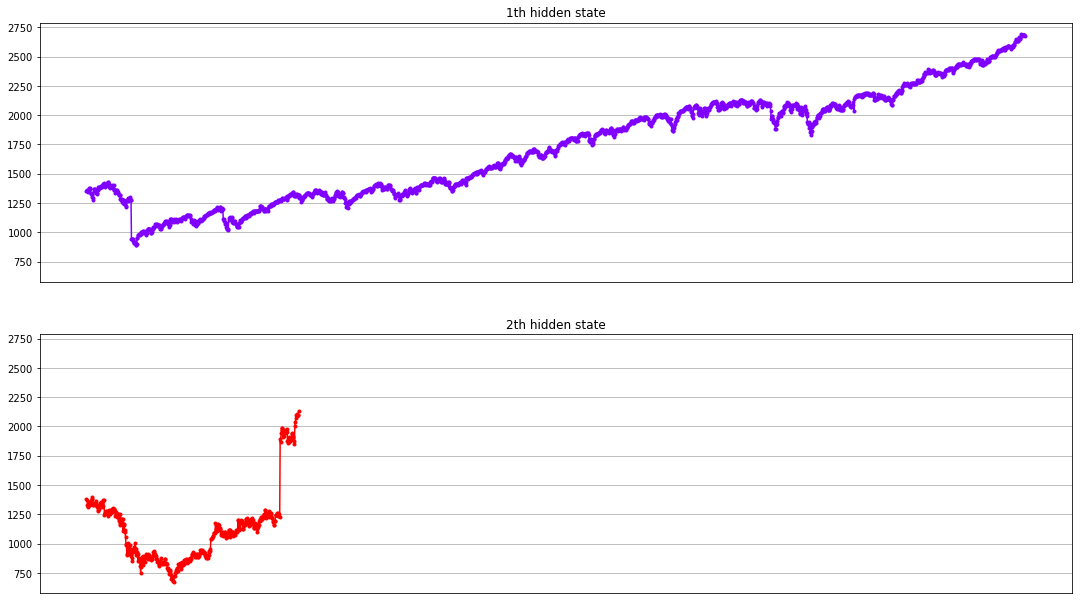

In [11]:
# plotting the volatility grouped by regime 
close_prices = sp_prices["Adj Close"]
dates = sp_prices[const.COL_DATE]

# plot for model A (2 states)
fig, axs = plt.subplots(model_a.n_components, sharex=True, sharey=True)
fig.set_size_inches(18.5,10.5)

colours = cm.rainbow(np.linspace(0,1, model_a.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    
    mask = hidden_states_a == i
    ax.plot_date(dates[mask], close_prices[mask],".-", c=colour)
    ax.set_title("{}th hidden state".format(i + 1))
    
    # format the ticks 
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())
    
    ax.grid(True)
    
plt.show()

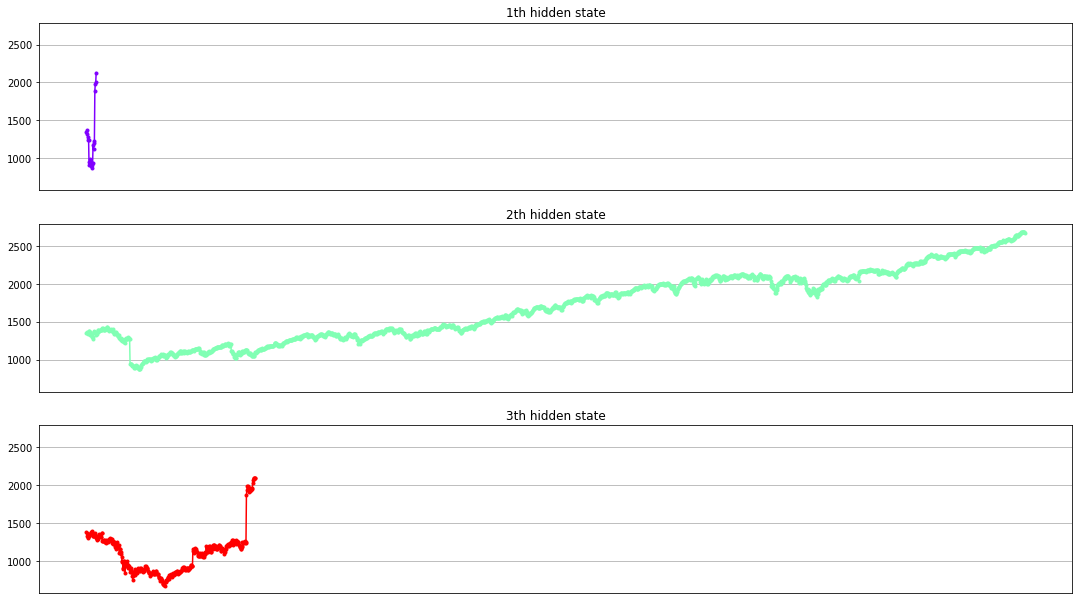

In [12]:
# plot for model B (3 states)
fig, axs = plt.subplots(model_b.n_components, sharex=True, sharey=True)
fig.set_size_inches(18.5,10.5)

colours = cm.rainbow(np.linspace(0,1, model_b.n_components))
for i, (ax, colour) in enumerate(zip(axs, colours)):
    
    mask = hidden_states_b == i
    ax.plot_date(dates[mask], close_prices[mask],".-", c=colour)
    ax.set_title("{}th hidden state".format(i + 1))
    
    # format the ticks 
    ax.xaxis.set_major_locator(YearLocator())
    ax.xaxis.set_minor_locator(MonthLocator())
    
    ax.grid(True)
    
plt.show()

<b>(v)</b> Comment on the findings and discuss the difference in outcomes between the two models